In [76]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#test

In [2]:
data1 = pd.read_csv("Part1 - Normal.csv")
data2 = pd.read_csv("Part1 - Type_H.csv")
data3 = pd.read_csv("Part1 - Type_S.csv")

In [3]:
data1.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [4]:
data2.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [5]:
data3.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [6]:
data1.shape

(100, 7)

In [7]:
data2.shape

(60, 7)

In [8]:
data3.shape

(150, 7)

#### CHECKING THE COLUMNS ARE SAME OR NOT

In [9]:
if data1.columns.tolist() == data2.columns.tolist() == data3.columns.tolist():
    print("Columns are same")
else:
    print("Columns are different")

Columns are same


In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [12]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


In [13]:
data1.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
std,12.368161,6.778503,12.361388,9.624004,9.014246,6.307483
min,30.741938,-5.845994,19.071075,17.386972,100.501192,-11.058179
25%,42.817849,8.799951,35.000000,32.340487,118.182659,-1.511360
50%,50.123115,13.482435,42.638923,37.059694,123.874328,1.152710
75%,61.470097,16.785953,51.602346,44.608788,129.040401,4.968807
max,89.834676,29.894119,90.563461,67.195460,147.894637,31.172767


### Checking and correcting the Typo in the Class Variable

In [25]:
unique_class_data1 = data1['Class'].unique()
unique_class_data1

array(['Normal'], dtype=object)

In [26]:
data1.loc[data1['Class'] == 'Nrmal', 'Class'] = 'Normal'

In [27]:
unique_class1_data1 = data1['Class'].unique()
unique_class1_data1

array(['Normal'], dtype=object)

In [28]:
unique_class_data2 = data2['Class'].unique()
unique_class_data2

array(['Type_H'], dtype=object)

In [29]:
data2.loc[data2['Class'] == 'type_h', 'Class'] ='Type_H'

In [30]:
unique_class_data2 = data2['Class'].unique()
unique_class_data2

array(['Type_H'], dtype=object)

In [31]:
unique_class_data3 = data3['Class'].unique()
unique_class_data3

array(['Type_S'], dtype=object)

In [32]:
data3.loc[data3['Class'] == 'tp_s', 'Class'] = 'Type_S'

In [33]:
unique_class_data3 = data3['Class'].unique()
unique_class_data3

array(['Type_S'], dtype=object)

In [34]:
final_df = pd.concat([data1, data2, data3])

In [35]:
unique_class_final_df = final_df['Class'].unique()
unique_class_final_df

array(['Normal', 'Type_H', 'Type_S'], dtype=object)

In [36]:
final_df.shape

(310, 7)

In [37]:
final_df.notnull().all(axis=0)

P_incidence    True
P_tilt         True
L_angle        True
S_slope        True
P_radius       True
S_Degree       True
Class          True
dtype: bool

### Checking the skewness and histogram univariate Graphs

Variable Name :  P_incidence
Skewness observed :  0.5179182448891371


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


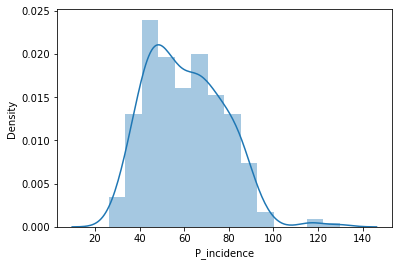

Variable Name :  P_tilt
Skewness observed :  0.673275303734576


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


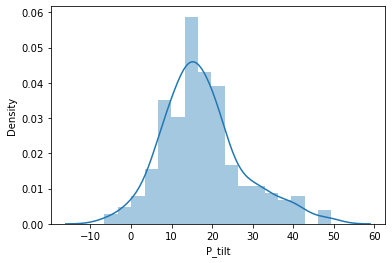

Variable Name :  L_angle
Skewness observed :  0.5965469984841169


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


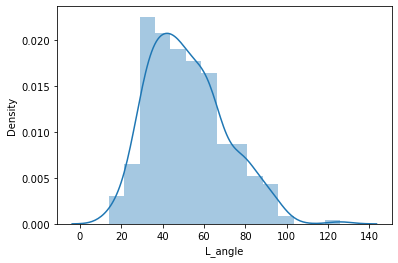

Variable Name :  S_slope
Skewness observed :  0.7887364793380615


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


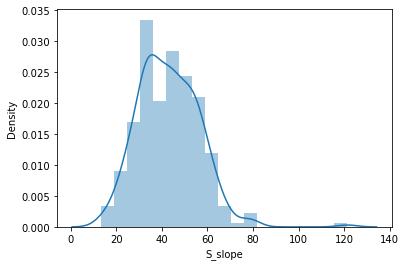

Variable Name :  P_radius
Skewness observed :  -0.17597806279183772


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


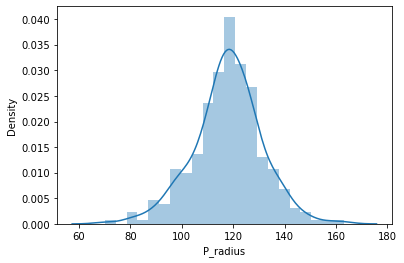

Variable Name :  S_Degree
Skewness observed :  4.297032173926705


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


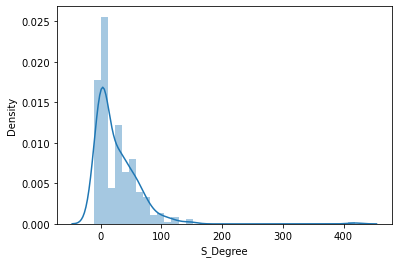

In [39]:
for col in final_df:
    if col == 'Class':
        continue
    print("Variable Name : ", col)
    
    print("Skewness observed : ", skew(final_df[col]))
    
    plt.figure()
    sns.distplot(final_df[col])
    plt.show()

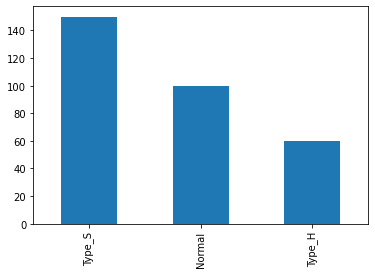

In [40]:
    final_df['Class'].value_counts().plot(kind='bar')
    plt.show()

### Bi-variate Analysis

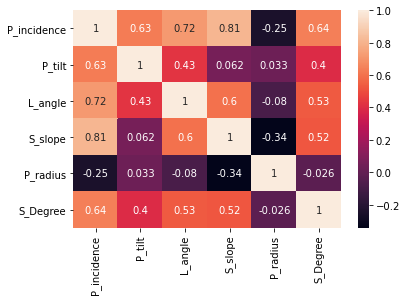

In [41]:
sns.heatmap(final_df.corr(), annot=True)
plt.show()

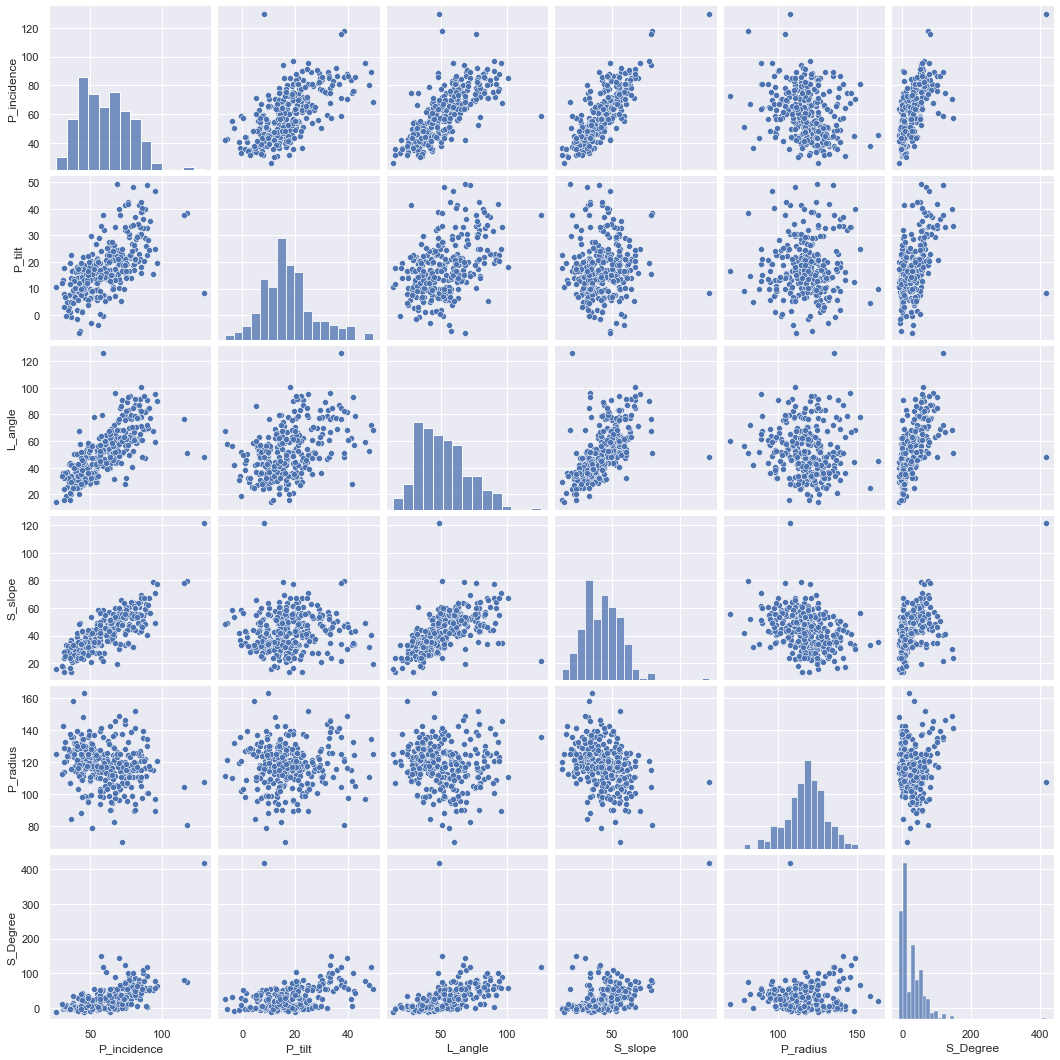

In [42]:
sns.set()
sns.pairplot(final_df, height = 2.5)
plt.show()

### Multi-Variate Analysis

### Plotting lmplot graph with hue as Class which is the target varaible

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\P

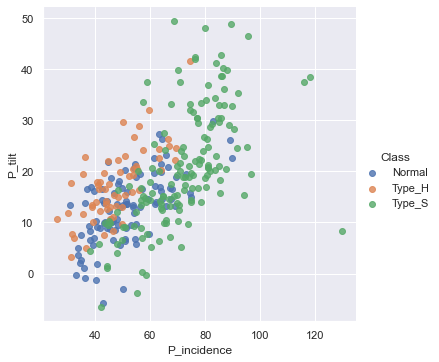

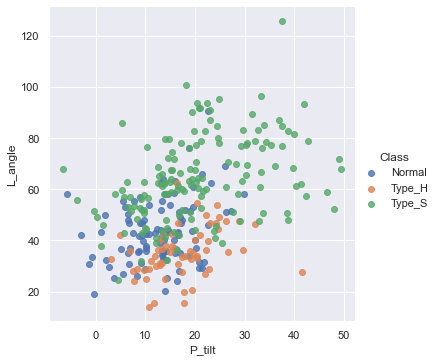

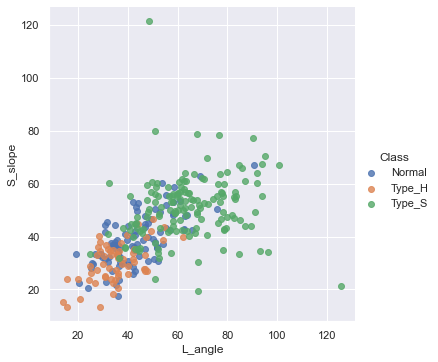

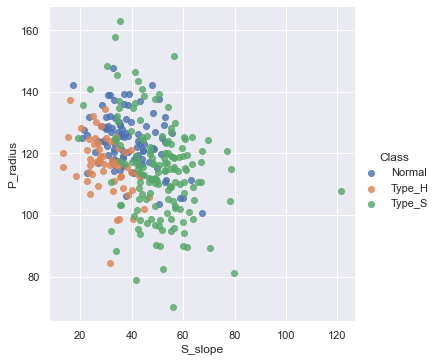

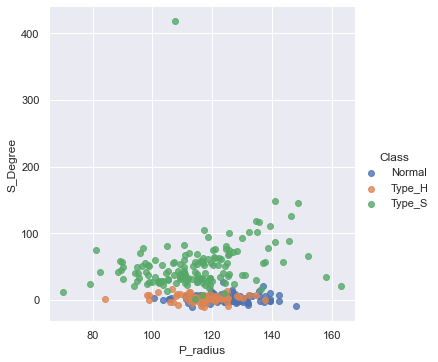

In [44]:
for i in range(0,5):
    sns.lmplot(column[i], column[i+1], final_df, hue='Class', fit_reg=False)

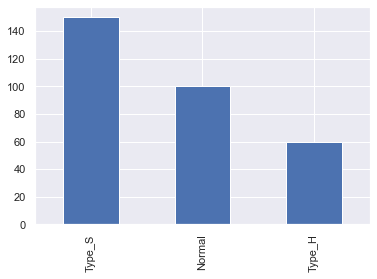

In [45]:
pd.value_counts(final_df["Class"]).plot(kind="bar");

### The Class variable is imbalanced

### Before that Standarisation of the data would be done with the help of standard scaler. One hot encoding of the categorical variable is also necessary

In [46]:
final_df.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [47]:
#Use label encoder to convert categorical variables to one-hot encoding (dummy variables)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_df['Class'] = le.fit_transform(final_df['Class'])

In [48]:
final_df.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [49]:
final_df['Class'].unique()

array([0, 1, 2])

In [50]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [51]:
X_std = pd.DataFrame(StandardScaler().fit_transform(final_df))
X_std.columns = final_df.columns

In [52]:
import numpy as np
from sklearn.model_selection import train_test_split

X = final_df.values[:,:6] 
y = final_df.values[:,6]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [54]:
print(X_train.shape)
print(y_train.shape)

(248, 6)
(248,)


In [55]:
print(X_test.shape)
print(y_test.shape)

(62, 6)
(62,)


### Using SMOTE to deal with imbalance data

In [56]:
!pip install imblearn

In [57]:
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from collections import Counter

0.8.0


In [58]:
counter = Counter(y_train)
print(counter)

Counter({2.0: 123, 0.0: 79, 1.0: 46})


In [59]:
oversample = SMOTE()

In [60]:
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [61]:
counter = Counter(y_train)
print(counter)

Counter({0.0: 123, 1.0: 123, 2.0: 123})


### Now the dataset is balanced

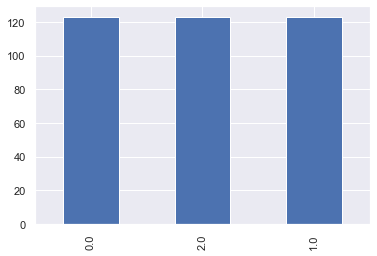

In [62]:
pd.value_counts(y_train).plot(kind="bar");

### Designing the Model training using KNN Clasifier

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [64]:
# instantiate learning model with k=3 first
knn = KNeighborsClassifier(n_neighbors = 3)

In [65]:
# fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [66]:
# predict the response
y_pred = knn.predict(X_test)

In [67]:
# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.7903225806451613


### Trying out different k values initially

In [68]:
# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))


0.8225806451612904


In [69]:
knn = KNeighborsClassifier(n_neighbors=9)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.8064516129032258


In [70]:
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

### Automating the process of finding best value for K

In [71]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 7


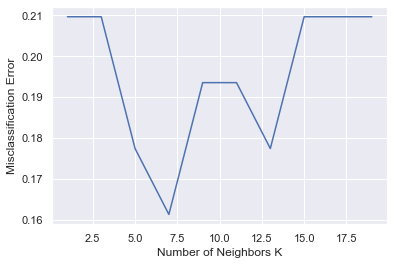

In [72]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### We found out that the best K value is 11

In [73]:
#Use k=11 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 11)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)



In [74]:
print(accuracy_score(y_test, y_pred))

0.8064516129032258


In [75]:
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

Recall Score :  0.8064516129032258


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


### Conclusion: The Model built is having an accuracy of 88.7% which is good and a recall of 88.7% which is also good. This would lead to good judgement on the new data.

### Suggestions and Improvements

#### The Data collected had some minor errors of spellings which needed to be fixed before using it. For eg. The Class variable had a typo of Nrmal instead of Normal. It would have been better if all the csv files were already merged to a single file. As the data also had some negative values, that needed to be normalised before creating the model.

In [78]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

In [79]:
data1 = pd.read_csv("Part2 - Data1.csv")
data2 = pd.read_csv("Part2 -Data2.csv")

### Data Exploration

In [80]:
data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [81]:
data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [82]:
final_df = pd.merge(data1, data2, on = "ID", how = 'inner')

In [83]:
final_df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [84]:
final_df.size

70000

In [85]:
final_df.shape

(5000, 14)

In [86]:
final_df.ndim

2

In [87]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [88]:
final_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


### Data Cleansing

In [89]:
final_df.isnull().values.any()

True

In [90]:
for i in final_df.columns:
    if final_df[i].isnull().values.any() == False:
        print(i)

ID
Age
CustomerSince
HighestSpend
ZipCode
HiddenScore
MonthlyAverageSpend
Level
Mortgage
Security
FixedDepositAccount
InternetBanking
CreditCard


In [91]:
missing_values = final_df.isnull().sum()

# print the number of missing values of each variable
print(missing_values)

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64


### "LoanOnCard" has missing data in the data set

### We would require to impute data in the LoanOnCard

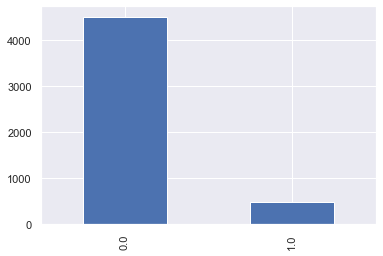

In [92]:
final_df['LoanOnCard'].value_counts().plot(kind='bar')
plt.show()

### Clearly the Maximum frequency is 0, so we could impute Blank spaces with 0s

In [93]:
final_df['LoanOnCard'] = final_df['LoanOnCard'].fillna(final_df['LoanOnCard'].mode()[0])

### Missing Value is Imputed to 0 which is the Mode for "LoanOnCard"

In [94]:
final_df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0.0


### Dropping the ID Column as it won't be helpful further

In [95]:
final_dff=final_df.drop('ID', axis =1 ) # dropping this column as it will not useful

### Changing the Data type of the Categorical Variables

In [96]:
final_dff.dtypes

Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [97]:
col = ['HiddenScore', 'Level', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']
for i in col:
    final_dff[i]=final_dff[i].astype('category')

In [98]:
final_dff.dtypes

Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object

### Univariate - Analysis

Variable Name :  Age
Skewness observed :  -0.029331878574766698


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


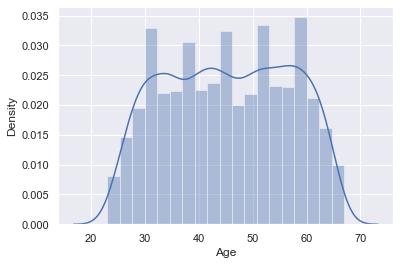

Variable Name :  CustomerSince
Skewness observed :  -0.026316790337654442


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


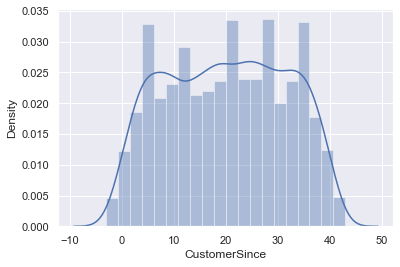

Variable Name :  HighestSpend
Skewness observed :  0.8410861846424931


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


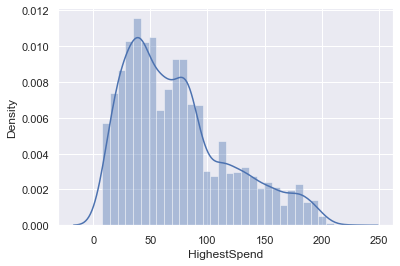

Variable Name :  ZipCode
Skewness observed :  -12.496470719254168


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


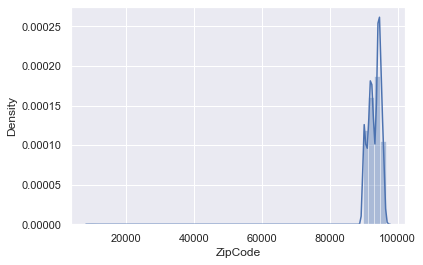

Variable Name :  HiddenScore
Skewness observed :  0.15517409936178264


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


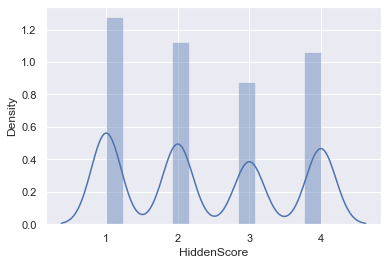

Variable Name :  MonthlyAverageSpend
Skewness observed :  1.5979637637001873


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


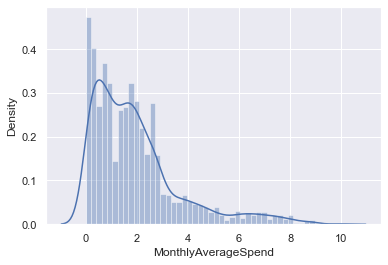

Variable Name :  Level
Skewness observed :  0.22702518198805896


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


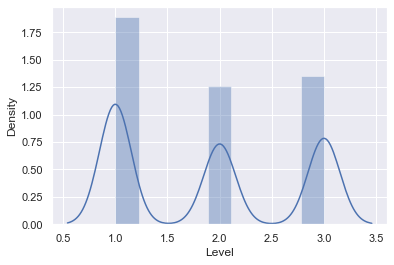

Variable Name :  Mortgage
Skewness observed :  2.103371065804789


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


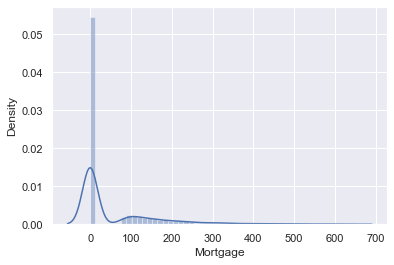

Variable Name :  Security
Skewness observed :  2.587491827731683


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


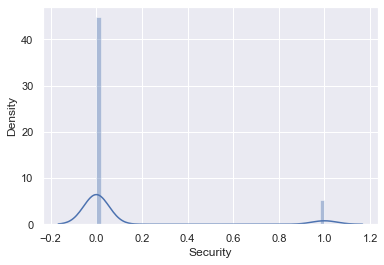

Variable Name :  FixedDepositAccount
Skewness observed :  3.6906061919698963


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


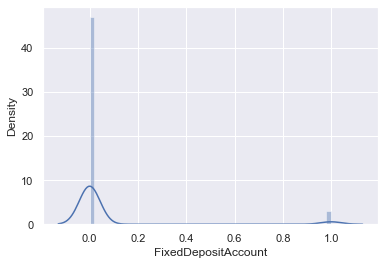

Variable Name :  InternetBanking
Skewness observed :  -0.3946668814543566


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


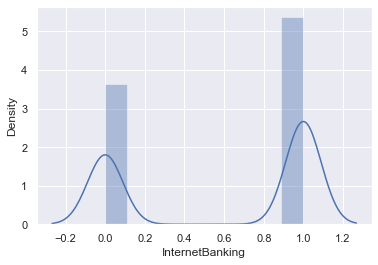

Variable Name :  CreditCard
Skewness observed :  0.904318051969846


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


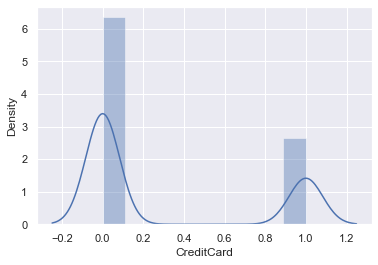

Variable Name :  LoanOnCard
Skewness observed :  2.74278350529752


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


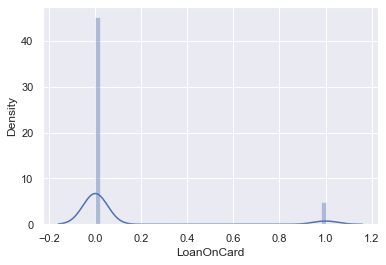

In [99]:
for col in final_dff:
    if col == 'Class':
        continue
    print("Variable Name : ", col)
    
    print("Skewness observed : ", skew(final_df[col]))
    
    plt.figure()
    sns.distplot(final_dff[col])
    plt.show()

# Bi-variate Analysis

In [100]:
final_dff.corr()

,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
Age,1.000000,0.994215,-0.055269,-0.029216,-0.052012,-0.012539
CustomerSince,0.994215,1.000000,-0.046574,-0.028626,-0.050077,-0.010582
HighestSpend,-0.055269,-0.046574,1.000000,-0.016410,0.645984,0.206806
ZipCode,-0.029216,-0.028626,-0.016410,1.000000,-0.004061,0.007383
MonthlyAverageSpend,-0.052012,-0.050077,0.645984,-0.004061,1.000000,0.109905
Mortgage,-0.012539,-0.010582,0.206806,0.007383,0.109905,1.000000


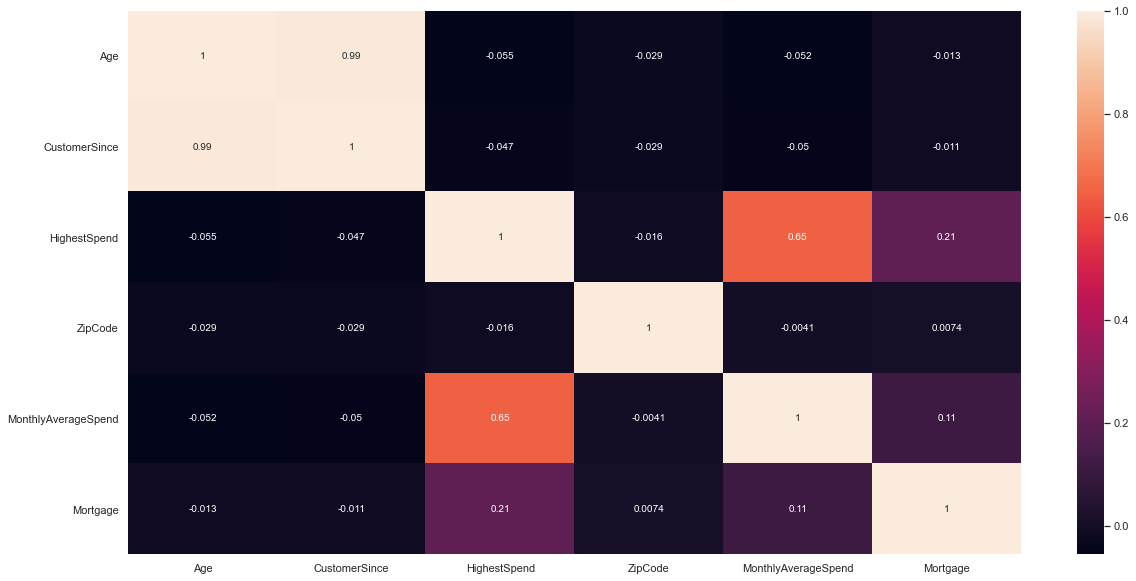

In [101]:
plt.subplots(figsize=(20,10)) 
sns.heatmap(final_dff.corr(), annot=True)
plt.show()

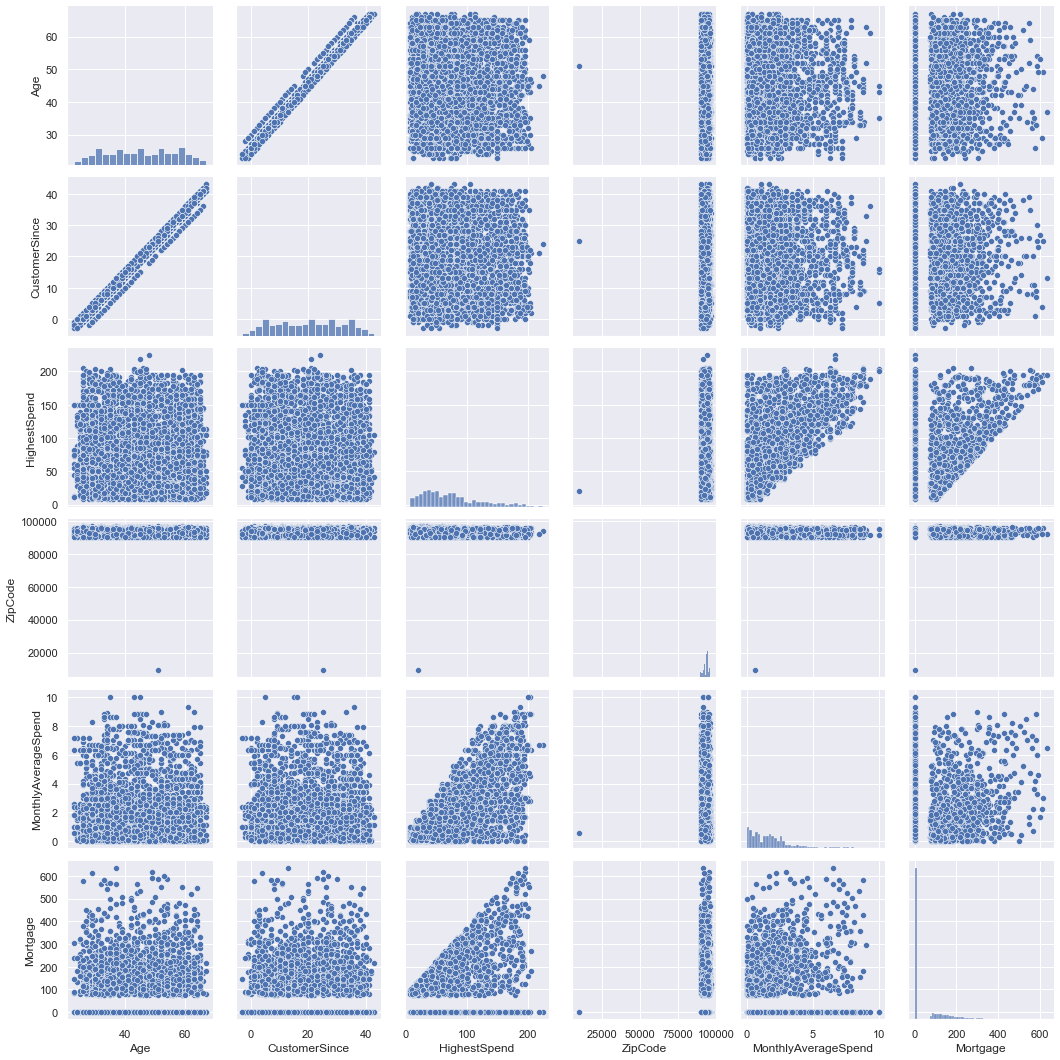

In [102]:
sns.set()
sns.pairplot(final_dff, height = 2.5)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

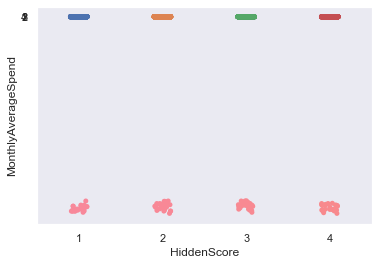

In [103]:
column=final_dff.columns
for i in range(0,5):
    #figure(figsize=(8, 6), dpi=80)
    sns.stripplot(final_dff[column[i]], final_dff[column[i+1]]);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Box plot of Customer Since')

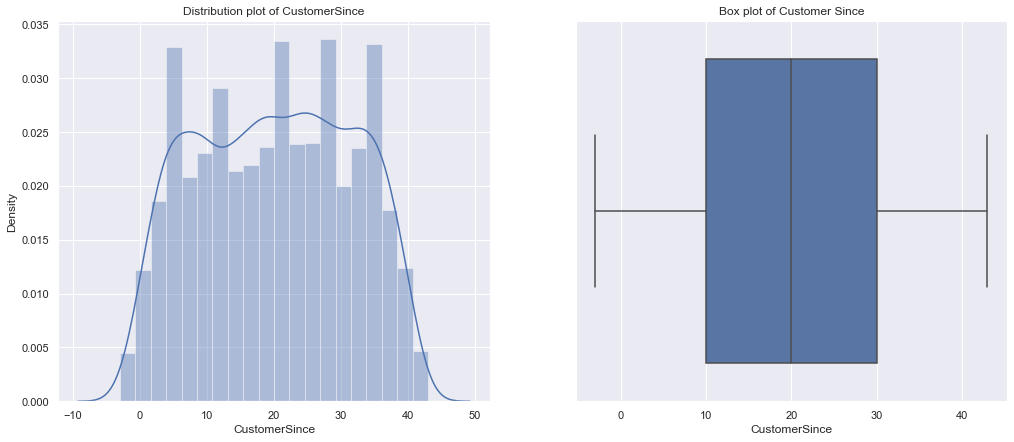

In [104]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'CustomerSince', data=final_dff,  orient='h' , ax=axes[1]);
sns.distplot(final_dff['CustomerSince'],  ax=axes[0]);
axes[0].set_title('Distribution plot of CustomerSince')
axes[1].set_title('Box plot of Customer Since')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Box plot of Customer Since')

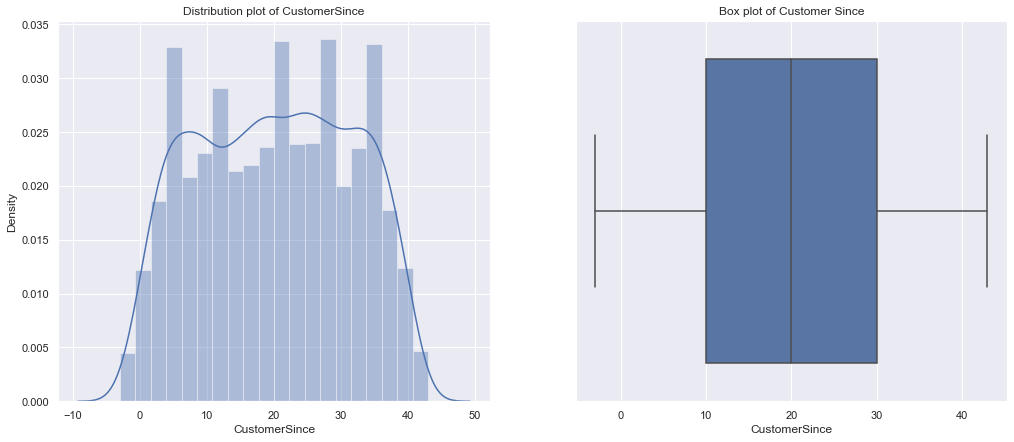

In [105]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'CustomerSince', data=final_dff,  orient='h' , ax=axes[1]);
sns.distplot(final_dff['CustomerSince'],  ax=axes[0]);
axes[0].set_title('Distribution plot of CustomerSince')
axes[1].set_title('Box plot of Customer Since')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Box plot')

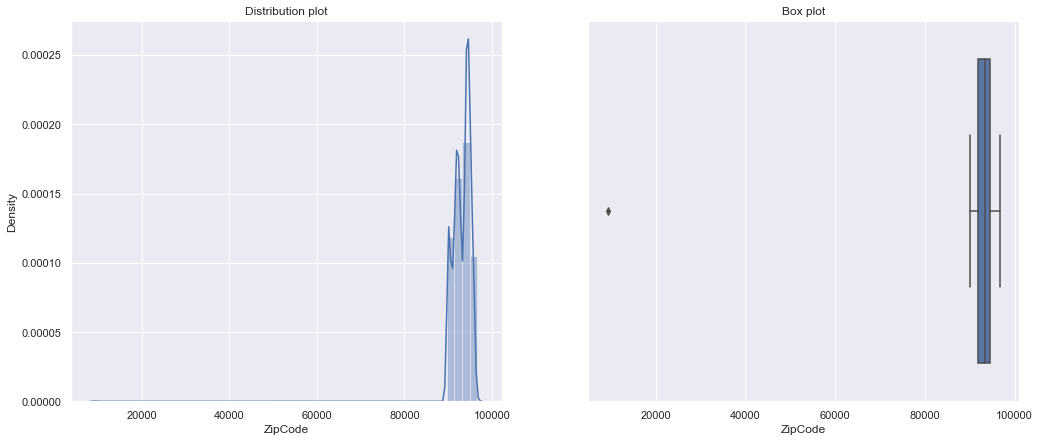

In [106]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'ZipCode', data=final_dff,  orient='h' , ax=axes[1])
sns.distplot(final_dff['ZipCode'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')

### ZipCode is not adding any value to the model, will drop during the model building

In [107]:
final_dff.head()

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0,0.0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1,0.0


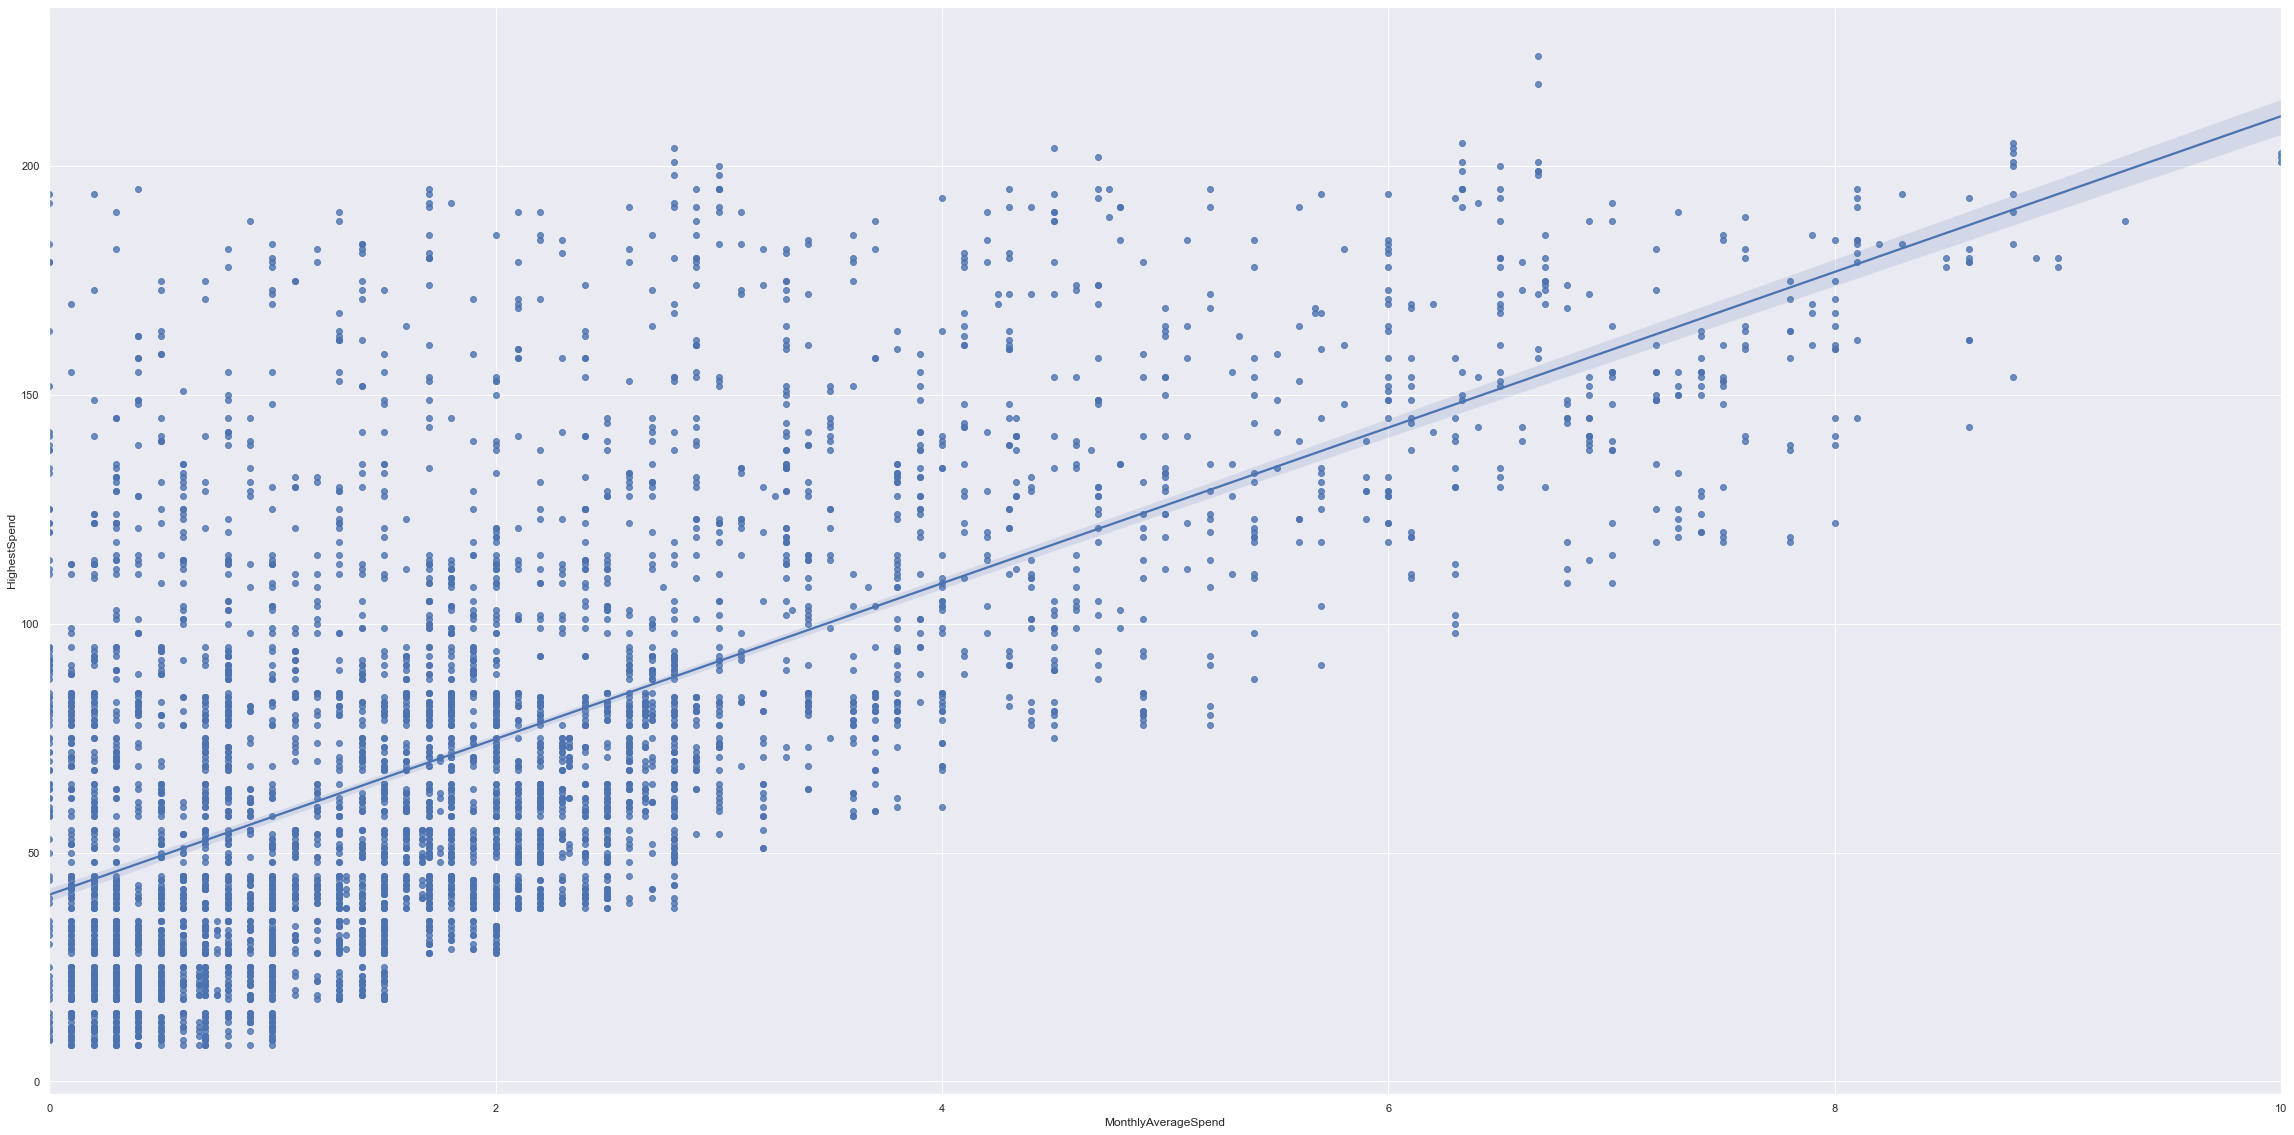

In [108]:
figure = plt.figure(figsize=(40,20))

ax = sns.regplot(x='MonthlyAverageSpend',y='HighestSpend', data=final_dff)

### Multi-Variate Analysis

### "Monthly average spend" vs "loan" vs "level"

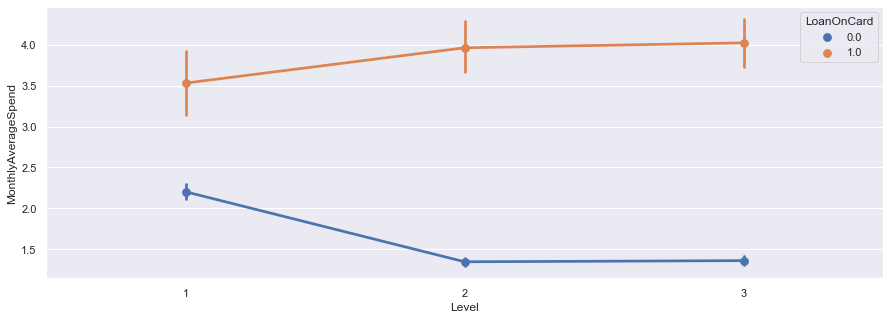

In [109]:
plt.figure(figsize=(15,5))
sns.pointplot(x="Level", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=final_dff)
plt.show()

### "MonthlyAverageSpend" vs "Loan" vs "InternetBanking"

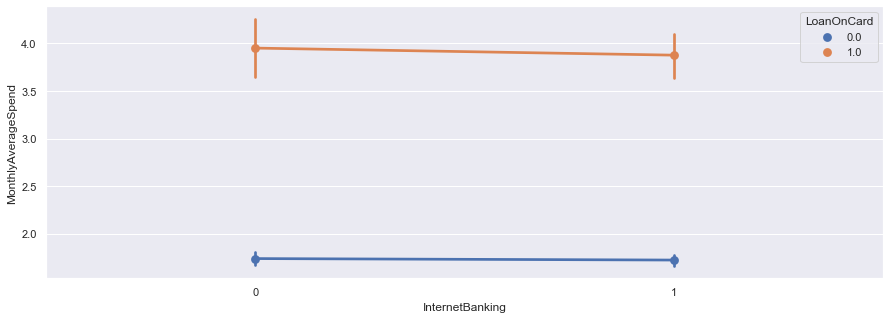

In [110]:
plt.figure(figsize=(15,5))
sns.pointplot(x="InternetBanking", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=final_dff)
plt.show()

### "MonthlyAverageSpend" vs "Loan" vs "CreditCard"

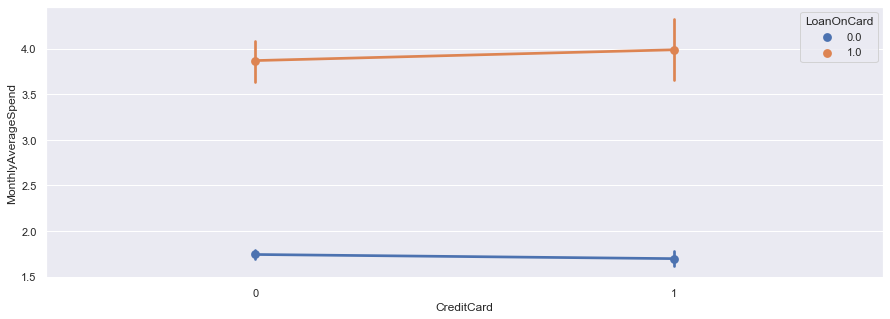

In [111]:
plt.figure(figsize=(15,5))
sns.pointplot(x="CreditCard", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=final_dff)
plt.show()

### Checking on Target Imbalance

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


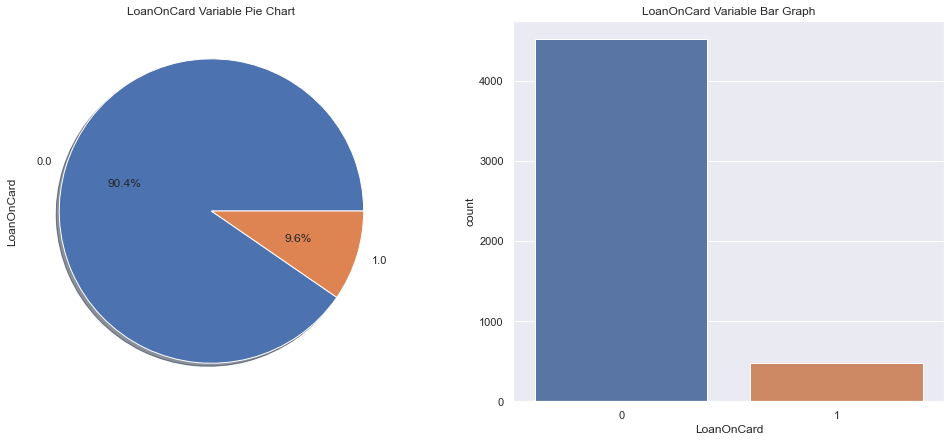

In [112]:
f,axes=plt.subplots(1,2,figsize=(17,7))
final_dff['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('LoanOnCard',data=final_dff,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

### As we can see there is imbalance in the data set. If this imbalance is not treated properly it can give degraded result of the model.¶

### We will use Oversampling to balance the data

## Segregating predictors vs target attributes

In [113]:
X=final_dff.drop(columns='LoanOnCard')
y=final_dff['LoanOnCard']

## Train-Test Split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [115]:
missing_values = X_train.isnull().sum()

# print the number of missing values of each variable
print(missing_values)

Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
dtype: int64


### Now we should balnce the data using SMOTE balancing on Training data only

In [117]:
X_train.dtypes

Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
dtype: object

In [118]:
col = ['HiddenScore', 'Level', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard']
smote_nc=SMOTENC(categorical_features=[4,6,8,9,10,11],random_state=42)
x_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)

In [119]:
print('After SMOTE is applied for class imbalance:')
print(y_train_res.value_counts())

After SMOTE is applied for class imbalance:
0.0    3160
1.0    3160
Name: LoanOnCard, dtype: int64


### Now the data of X train set is balanaced

# Applying Logistic Regression

In [121]:
logit = LogisticRegression()
logit.fit(x_train_res, y_train_res)

LogisticRegression()

In [122]:
logit_pred = logit.predict(X_test)

In [123]:
print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.858
Accuracy on Test data: 0.832


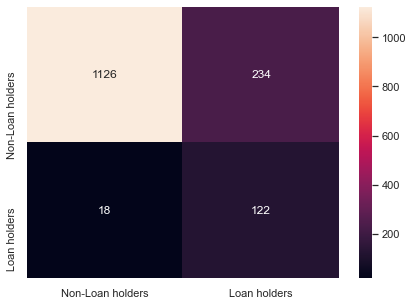

In [124]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [125]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.98      0.83      0.90      1360
         1.0       0.34      0.87      0.49       140

    accuracy                           0.83      1500
   macro avg       0.66      0.85      0.70      1500
weighted avg       0.92      0.83      0.86      1500



## Naive Bayes Model

In [127]:
g_model = GaussianNB()
g_model.fit(x_train_res, y_train_res.ravel())
g_pred = g_model.predict(X_test)

print('Accuracy on Training data:',g_model.score(X_train, y_train) )
print('Accuracy on Test data:',g_model.score(X_test, y_test) )

Accuracy on Training data: 0.8851428571428571
Accuracy on Test data: 0.882


### Here accuracy in test data slightly less compared to training data.

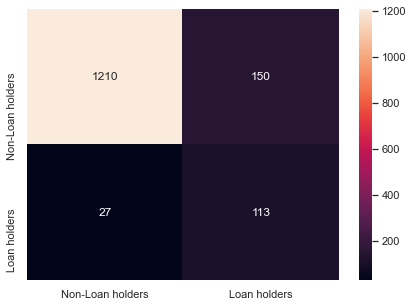

In [129]:
cm = confusion_matrix(y_test, g_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [130]:
print("classification  Matrix:\n",classification_report(y_test,g_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.98      0.89      0.93      1360
         1.0       0.43      0.81      0.56       140

    accuracy                           0.88      1500
   macro avg       0.70      0.85      0.75      1500
weighted avg       0.93      0.88      0.90      1500



### Recall value for class 1 is less in naive bayes model compared to logistic regression.

# CONCLUSION

### Although the model of Naive Baye's is having better accuracy than Logistic regression. 
### We would select Logistic Regression as our model as it has better recall. 
### Logistic Regression is not affected by overfitting and it is also has good recall value.
### Deviation also less in logistic regression.

# SUGGESTIONS

### I will suggest to give no imbalance data.
### The data should be equally present for both the clasess of the target variable.
### No NAN value if observed would be good for the model building.
### It's better not to include variables which are of no use for predicting the target variable